# 観測ロケットMOMO1のテレメトリtelem1の結果可視化
2017年7月29日に打上げたMOMO1の結果であるUHFテレメトリ（telem1）を可視化


## 環境
Python 3.5 Anaconda

グラフが日本語表示されない場合は... http://qiita.com/knknkn1162/items/be87cba14e38e2c0f656

### 外部モジュール
https://github.com/moble/quaternion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy import pi, deg2rad, rad2deg, sin, cos
import quaternion
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
%config InlineBackend.figure_format = 'retina'
             

In [2]:
df_q = pd.read_csv("../csv/telem1/telem1_attitude.csv")
df_command = pd.read_csv("../csv/telem1/telem1_command_rf_and_voltages.csv")
df_ecef = pd.read_csv("../csv/telem1/telem1_ecef_ecefvel.csv")
df_gps = pd.read_csv("../csv/telem1/telem1_GPS.csv")
df_fireflyA = pd.read_csv("../csv/telem1/telem1_ecef_gpsinfo_firefly_a.csv")
df_fireflyB = pd.read_csv("../csv/telem1/telem1_ecef_gpsinfo_firefly_b.csv")
df_gimbal = pd.read_csv("../csv/telem1/telem1_gimbal.csv")
df_health = pd.read_csv("../csv/telem1/telem1_module_health.csv")
df_press = pd.read_csv("../csv/telem1/telem1_pressure_gauges.csv")
df_rssi = pd.read_csv("../csv/telem1/telem1_receicer_rssi.csv")
df_sensor = pd.read_csv("../csv/telem1/telem1_sensors.csv")
df_sequence = pd.read_csv("../csv/telem1/telem1_sequence_and_valve.csv")
df_temp = pd.read_csv("../csv/telem1/telem1_temperatures.csv")

savename = "../plot/MOMO1_telem1_"
source_txt = "(Source: UHF Telemetry)"

## 圧力履歴

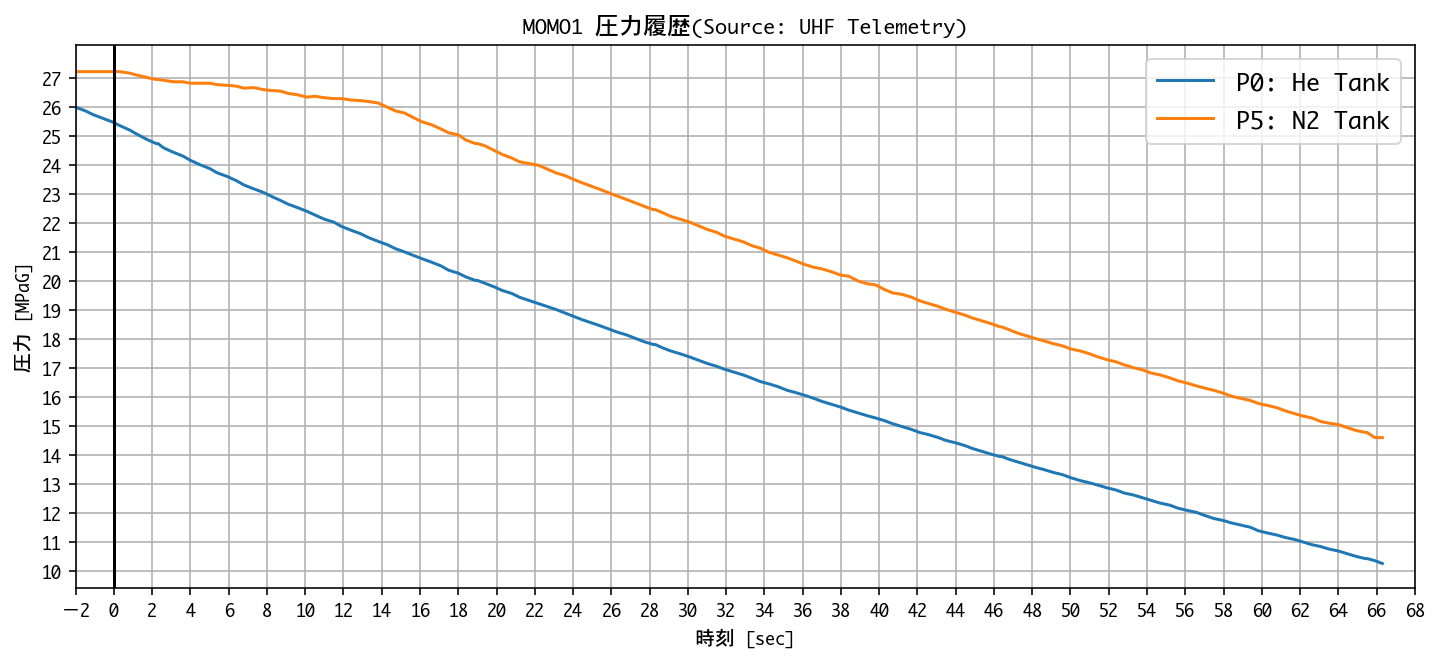

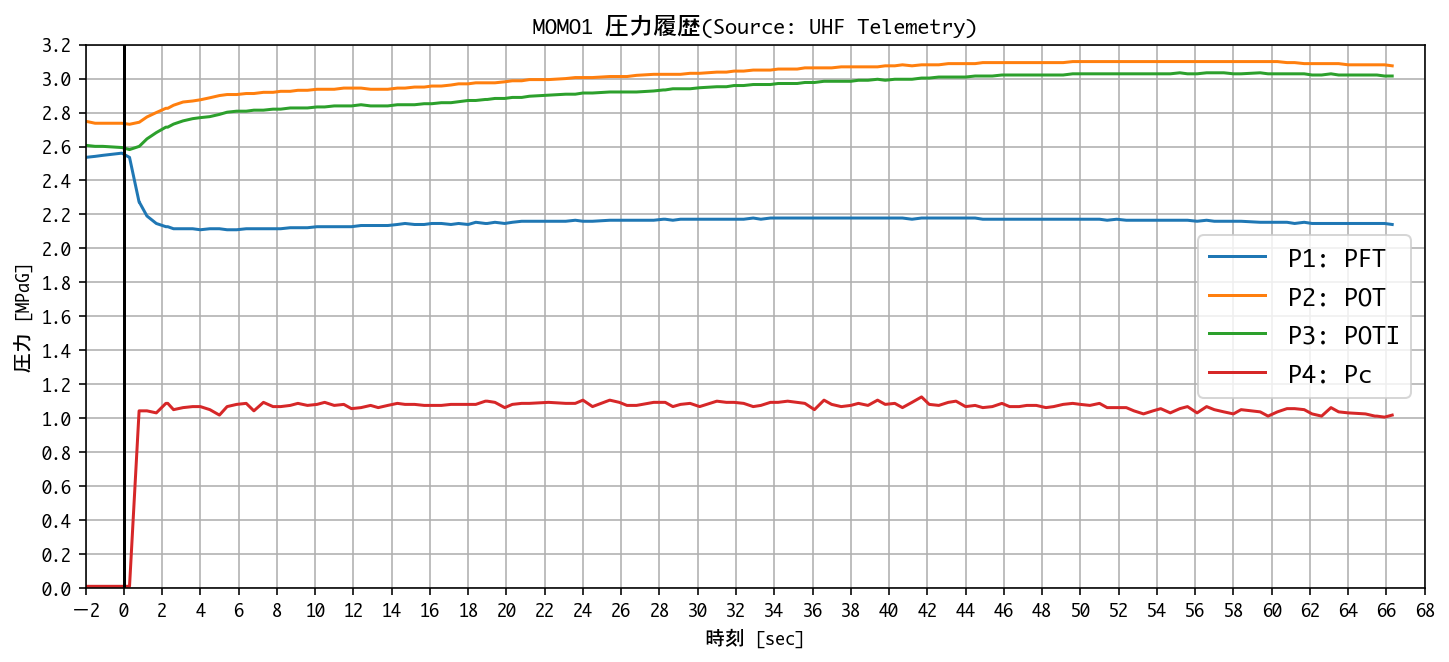

In [3]:
plt.figure()
plt.plot(df_press["T[s]"], df_press["P0[MPa]"], label="P0: He Tank")
plt.plot(df_press["T[s]"], df_press["P5[MPa]"], label="P5: N2 Tank")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 圧力履歴" + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.yticks(np.arange(10,28))
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure_high" + ".png")

plt.figure()
plt.plot(df_press["T[s]"], df_press["P1[MPa]"], label="P1: PFT")
plt.plot(df_press["T[s]"], df_press["P2[MPa]"], label="P2: POT")
plt.plot(df_press["T[s]"], df_press["P3[MPa]"], label="P3: POTI")
plt.plot(df_press["T[s]"], df_press["P4[MPa]"], label="P4: Pc")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 圧力履歴" + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.yticks(np.arange(0,3.4,0.2))
plt.ylim([0, 3.2])
plt.axvline(x=0, color="k")
plt.savefig(savename + "pressure" + ".png")

## 加速度・ジャイロ

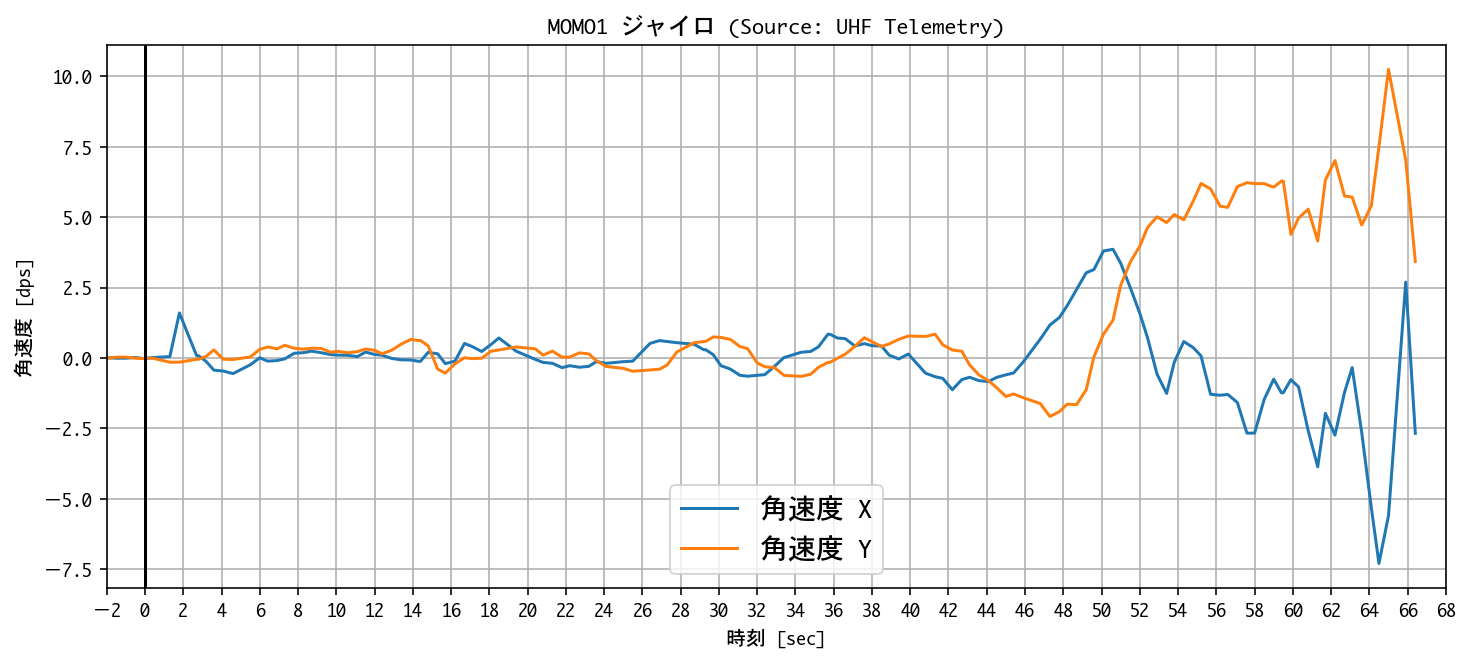

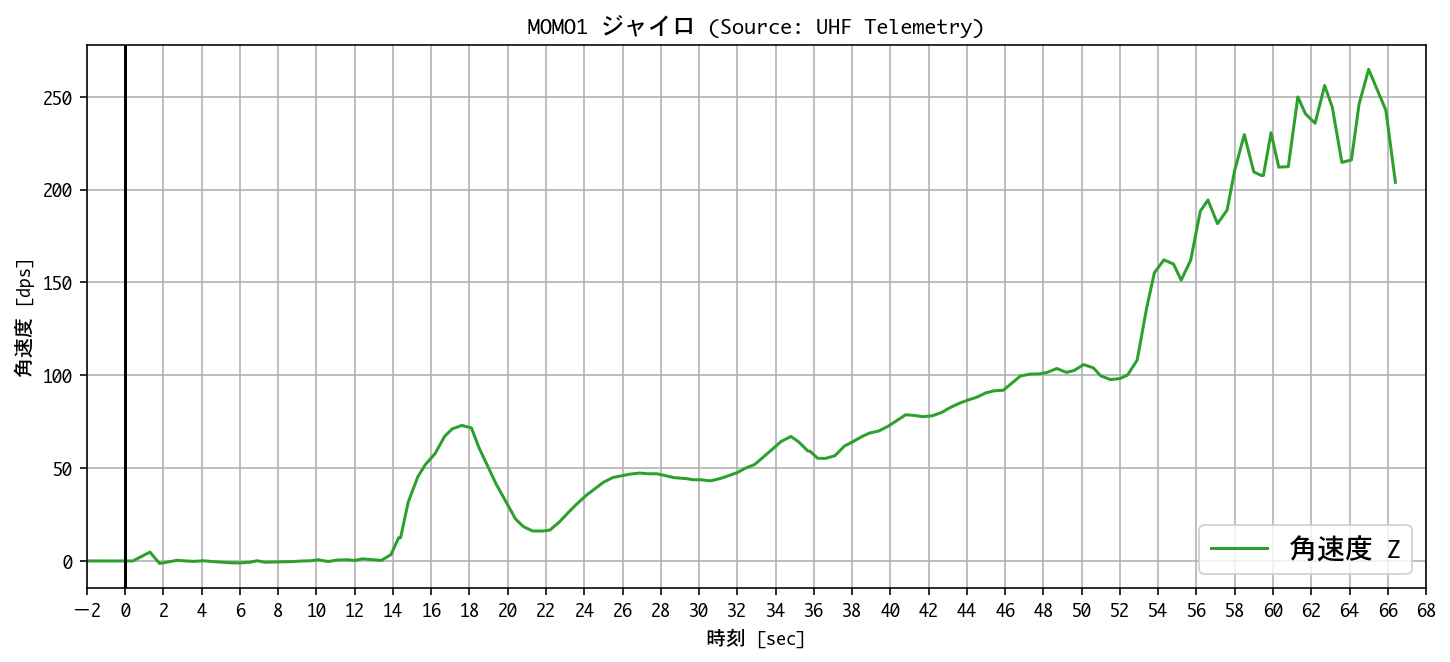

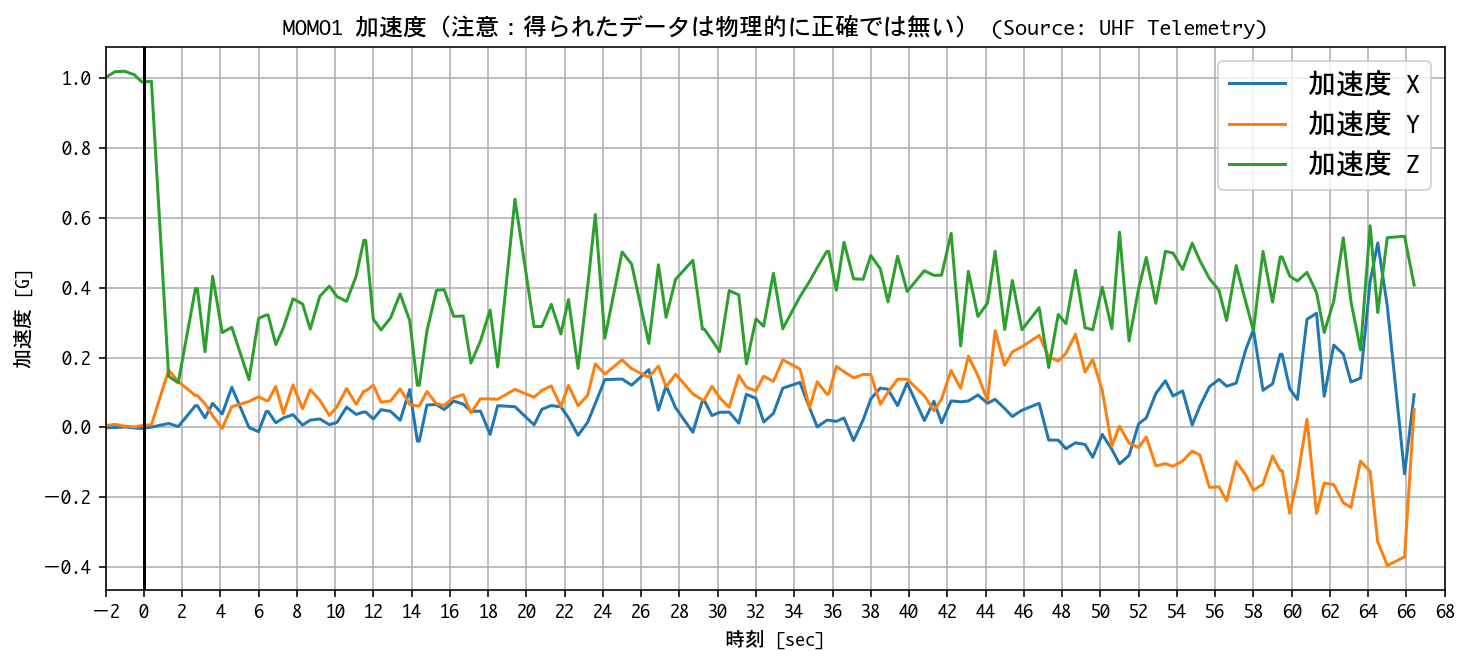

In [4]:
plt.figure()
plt.plot(df_sensor["T[s]"], df_sensor["wx[dps]"], label="角速度 X")
plt.plot(df_sensor["T[s]"], df_sensor["wy[dps]"], label="角速度 Y")
# plt.plot(df_sensor["T[s]"], df_sensor["wz[dps]"], label="角速度 Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジャイロ " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [dps]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gyro_XY" + ".png")

plt.figure()
plt.plot(df_sensor["T[s]"], df_sensor["wz[dps]"], color="C2", label="角速度 Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 ジャイロ " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [dps]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "gyro_Z" + ".png")

plt.figure()
plt.plot(df_sensor["T[s]"], df_sensor["ax[g]"], label="加速度 X")
plt.plot(df_sensor["T[s]"], df_sensor["ay[g]"], label="加速度 Y")
plt.plot(df_sensor["T[s]"], df_sensor["az[g]"], label="加速度 Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 加速度（注意：得られたデータは物理的に正確では無い） " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("加速度 [G]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "acceleration" + ".png")

## 気圧計

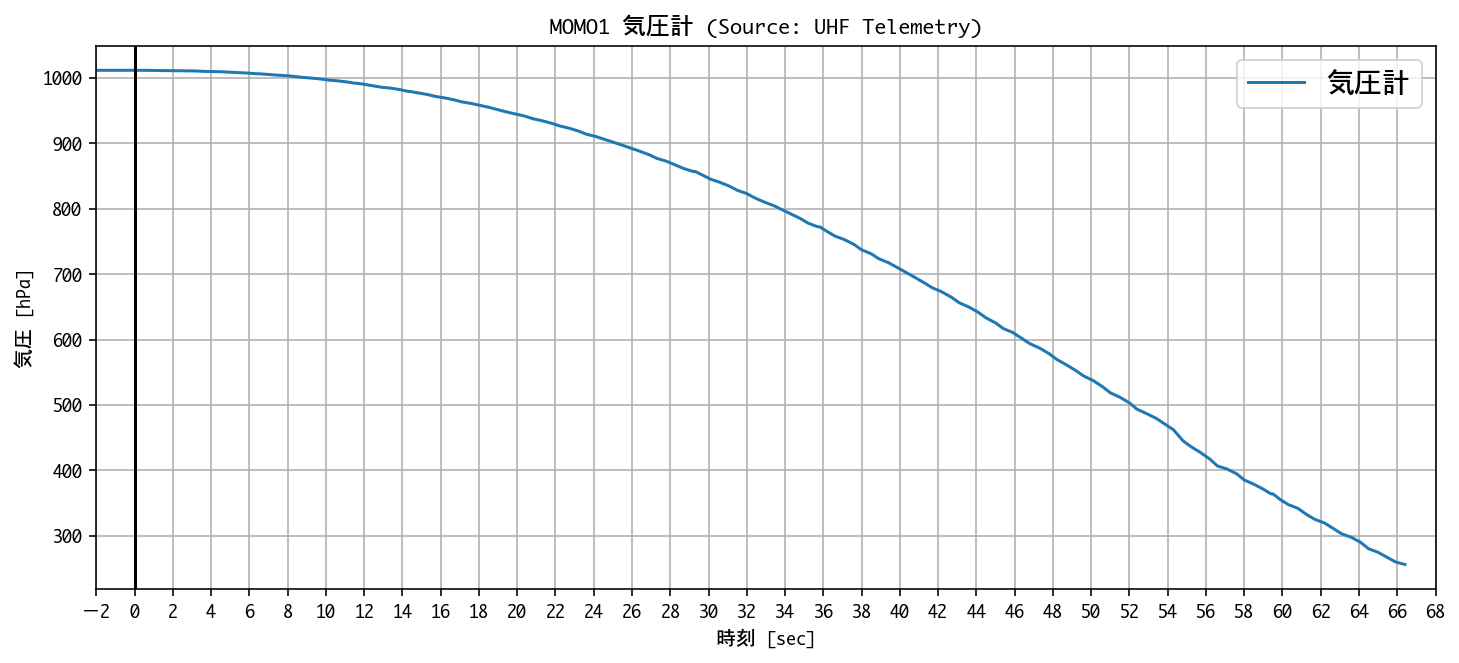

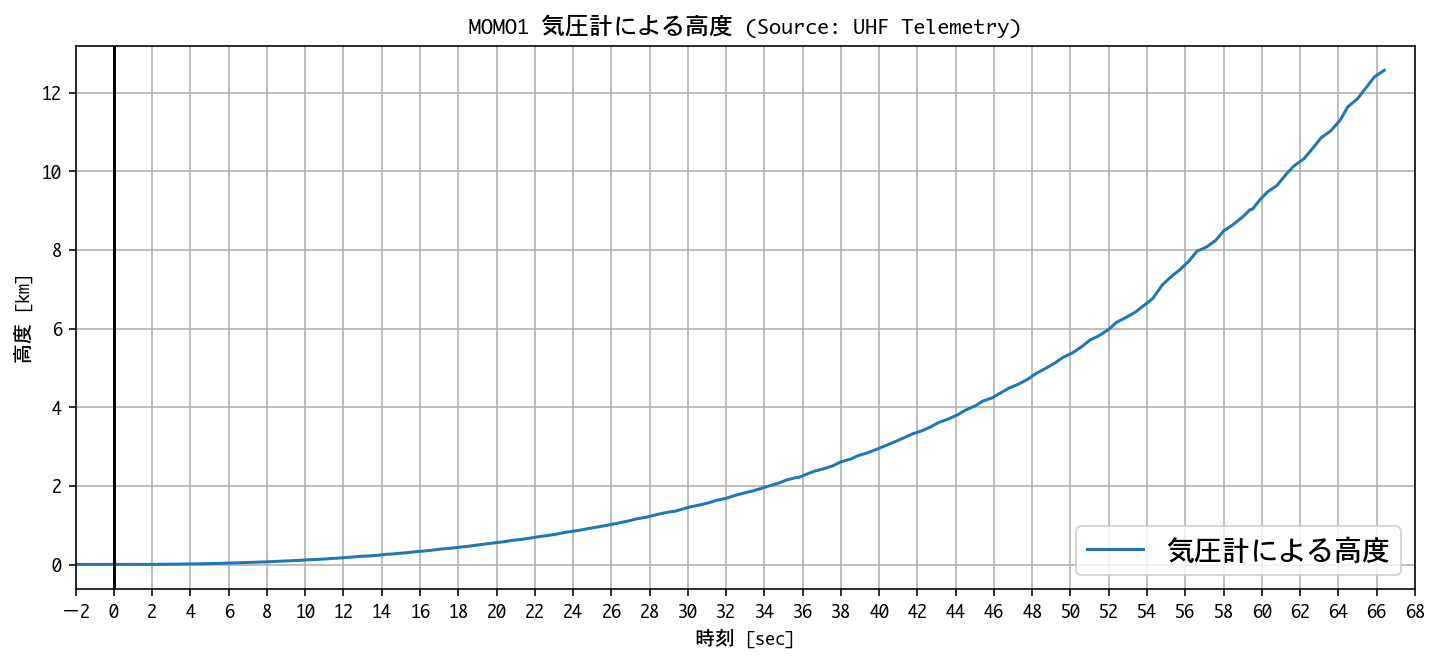

In [5]:
plt.figure()
plt.plot(df_sensor["T[s]"], df_sensor["barometer[Pa]"] / 100, label="気圧計")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 気圧計 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("気圧 [hPa]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "barometer" + ".png")

# 気圧と高度の関係式
# http://keisan.casio.jp/exec/system/1257609530
P0 = 101300 # 海面高度での気圧[Pa]
T0 = 0 # その高度での温度[℃]
alt_by_baro = ((P0/df_sensor["barometer[Pa]"])**(1/5.257) - 1) * (T0 + 273.15) / 0.0065

plt.figure()
plt.plot(df_sensor["T[s]"], alt_by_baro / 1000, label="気圧計による高度")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 気圧計による高度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("高度 [km]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "altitude_by_barometer" + ".png")

## 温度計

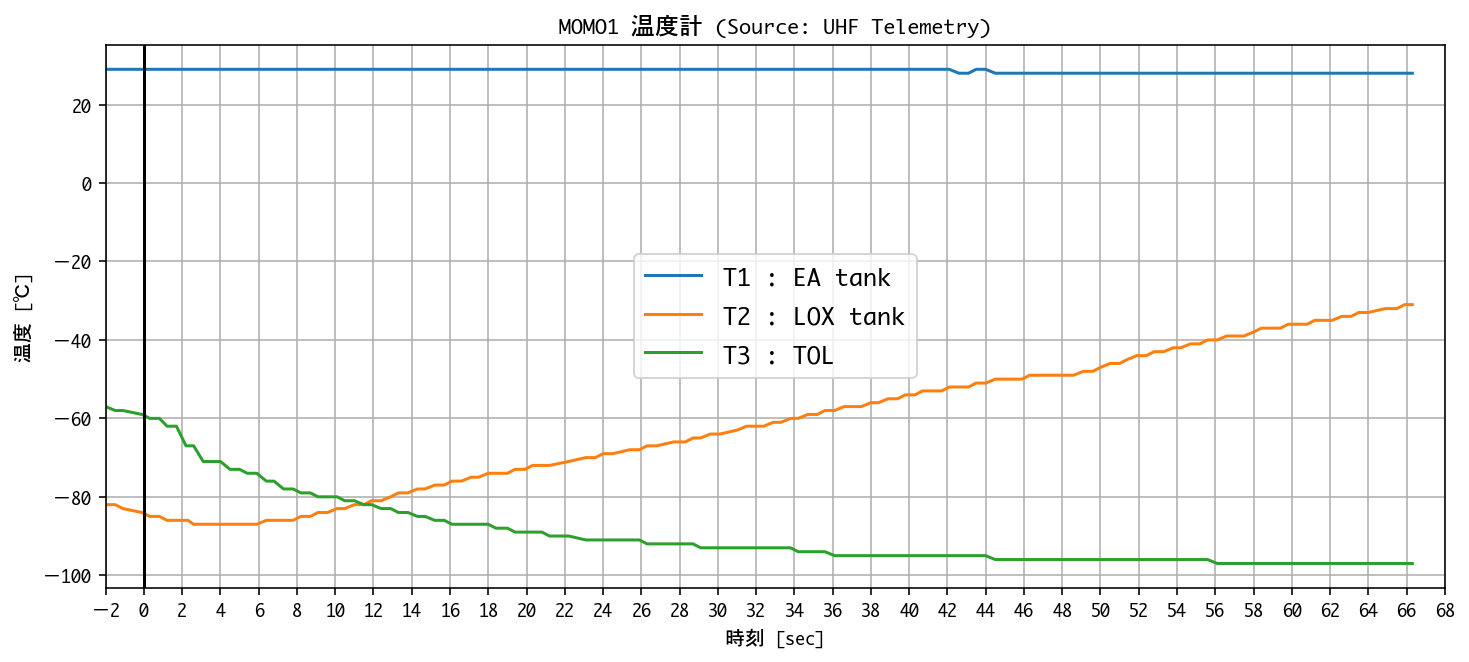

In [6]:
plt.figure()
plt.plot(df_temp["T[s]"], df_temp["T1[cdeg]"], label="T1 : EA tank")
plt.plot(df_temp["T[s]"], df_temp["T2[cdeg]"], label="T2 : LOX tank")
plt.plot(df_temp["T[s]"], df_temp["T3[cdeg]"], label="T3 : TOL")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 温度計 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("温度 [℃]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "temperature" + ".png")

## GPS受信機のECEF座標系での位置速度

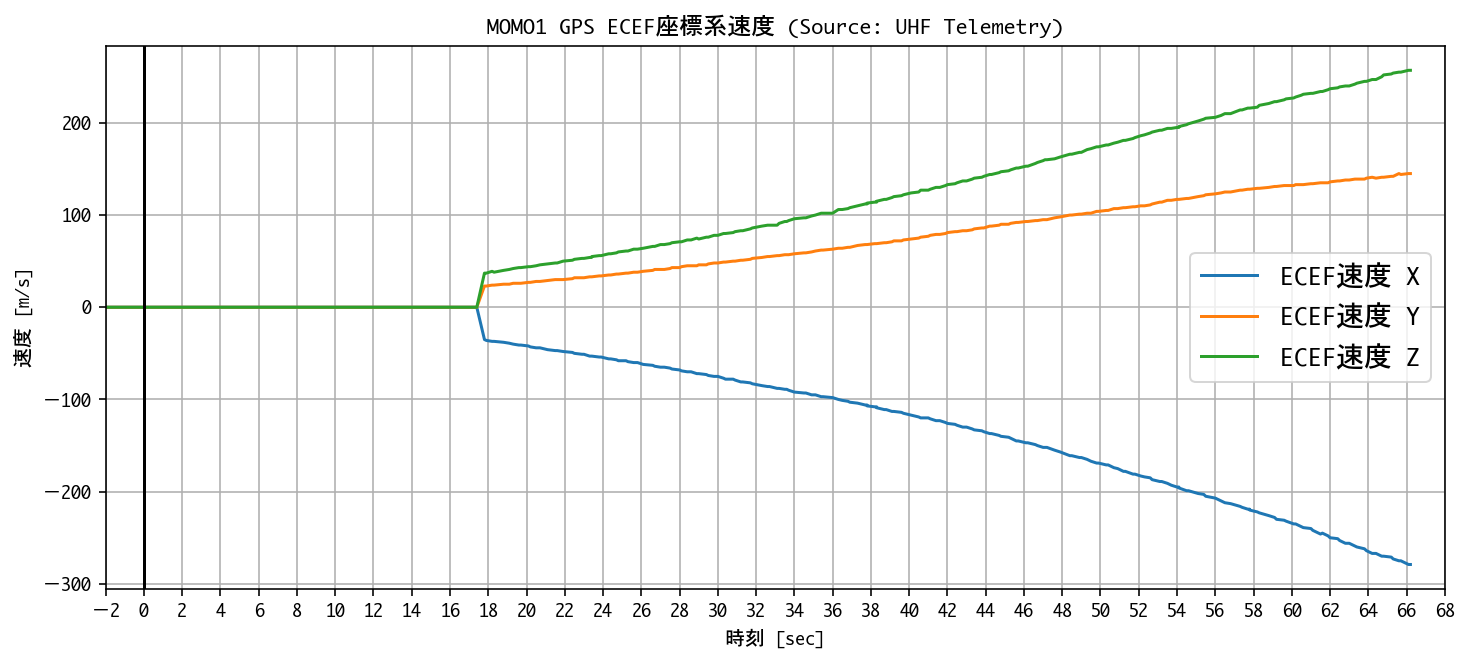

In [7]:
plt.plot(df_ecef["T[s]"], df_ecef["ecef_vx[m/s]"], label="ECEF速度 X")
plt.plot(df_ecef["T[s]"], df_ecef["ecef_vy[m/s]"], label="ECEF速度 Y")
plt.plot(df_ecef["T[s]"], df_ecef["ecef_vz[m/s]"], label="ECEF速度 Z")
plt.title("MOMO1 GPS ECEF座標系速度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("速度 [m/s]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.grid()
plt.legend(fontsize=14)
plt.savefig(savename + "GPS_ECEF_velocity" + ".png")

## GPS受信機の結果

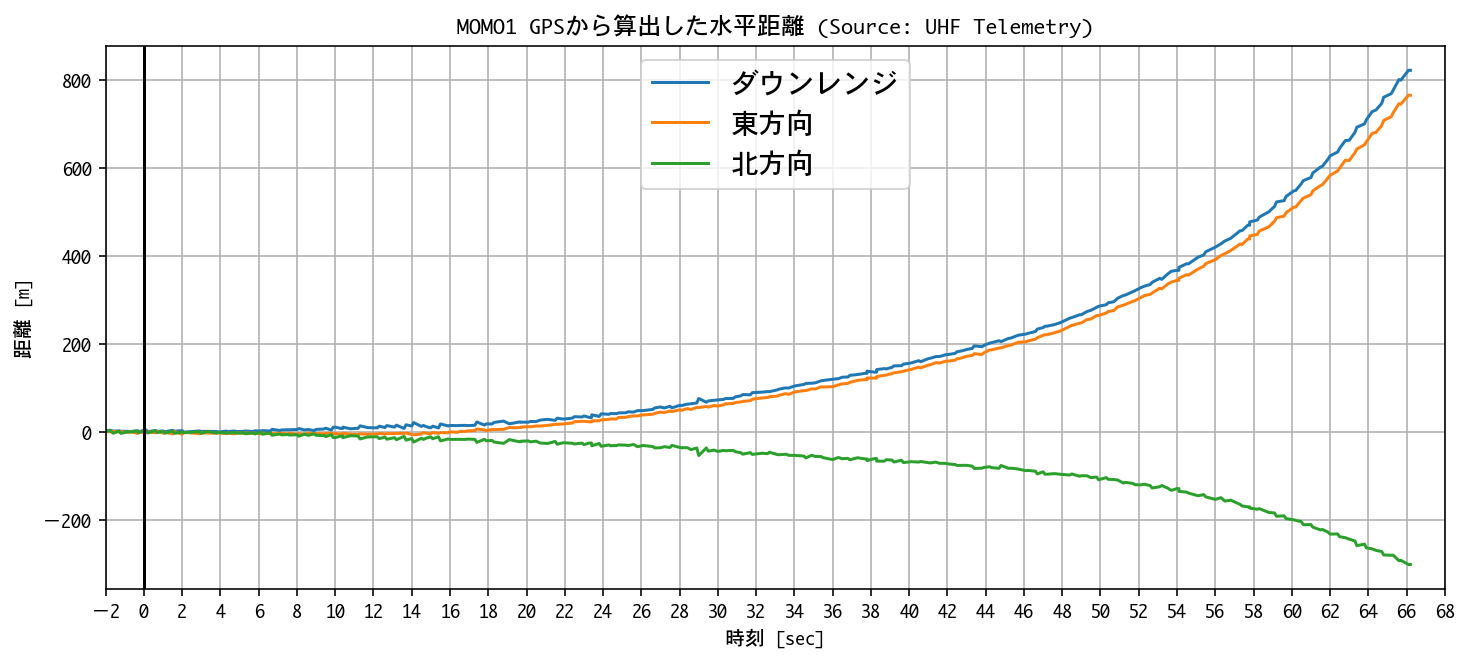

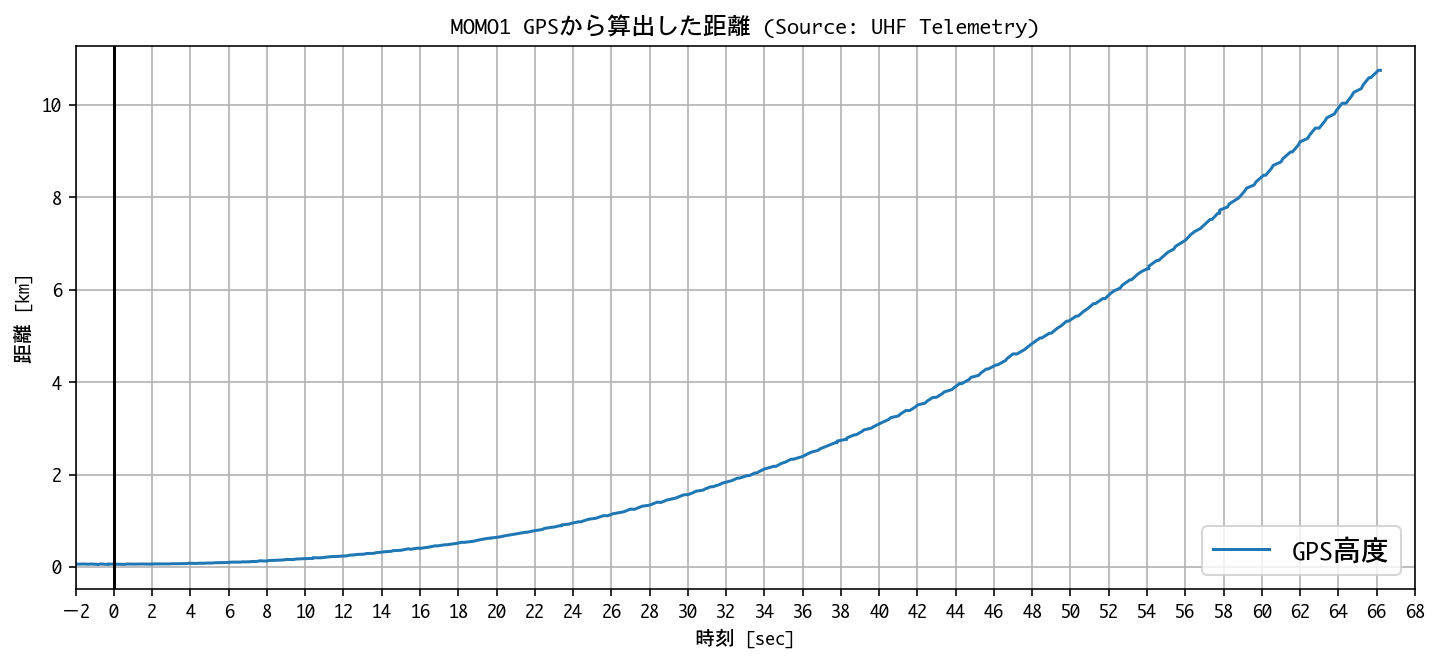

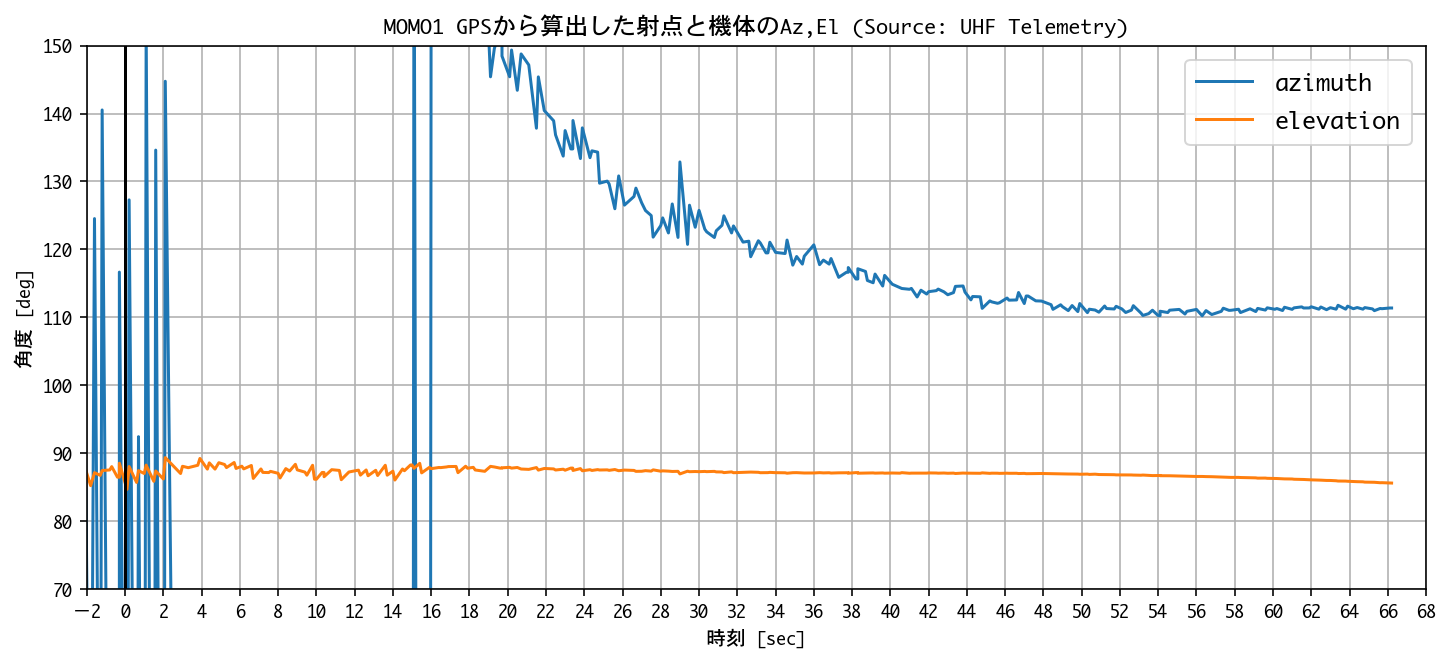

In [8]:
plt.figure()
plt.plot(df_gps["T[s]"], df_gps["distance_2d[m]"], label="ダウンレンジ")
plt.plot(df_gps["T[s]"], df_gps["distance_2d[m]"] * np.sin(np.deg2rad(df_gps["azimuth[deg]"])), label="東方向")
plt.plot(df_gps["T[s]"], df_gps["distance_2d[m]"] * np.cos(np.deg2rad(df_gps["azimuth[deg]"])), label="北方向")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 GPSから算出した水平距離 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("距離 [m]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
# plt.ylim([-200, 200])
plt.axvline(x=0, color="k")
plt.savefig(savename + "GPS_downrange" + ".png")

plt.figure()
plt.plot(df_gps["T[s]"], df_gps["alt[m]"] / 1000, label="GPS高度")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 GPSから算出した距離 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("距離 [km]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
# plt.ylim([-200, 200])
plt.axvline(x=0, color="k")
plt.savefig(savename + "GPS_distance" + ".png")

plt.figure()
plt.plot(df_gps["T[s]"], df_gps["azimuth[deg]"], label="azimuth")
plt.plot(df_gps["T[s]"], df_gps["elevation[deg]"], label="elevation")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 GPSから算出した射点と機体のAz,El " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-2,70,2))
plt.yticks(np.arange(70,160,10))
plt.xlim([-2, 68])
plt.ylim([70, 150])
plt.axvline(x=0, color="k")
plt.savefig(savename + "GPS_azel" + ".png")


## GPS受信機の状態

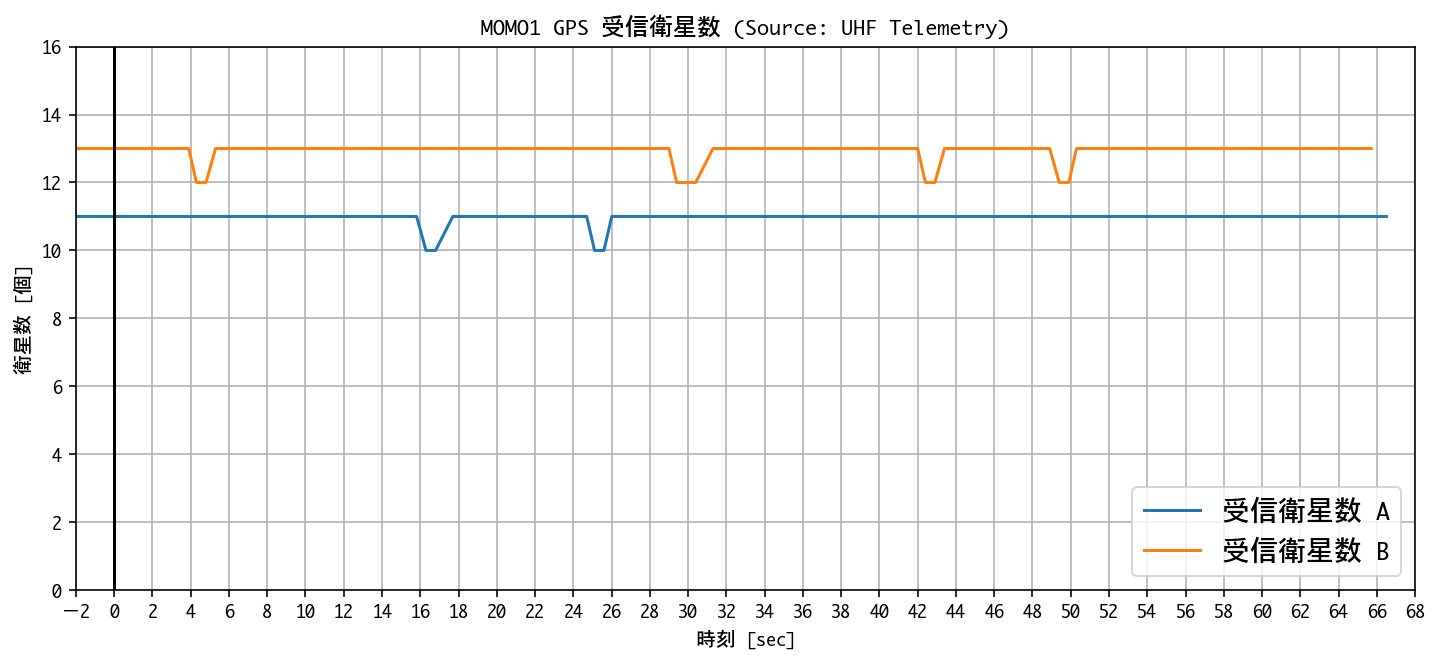

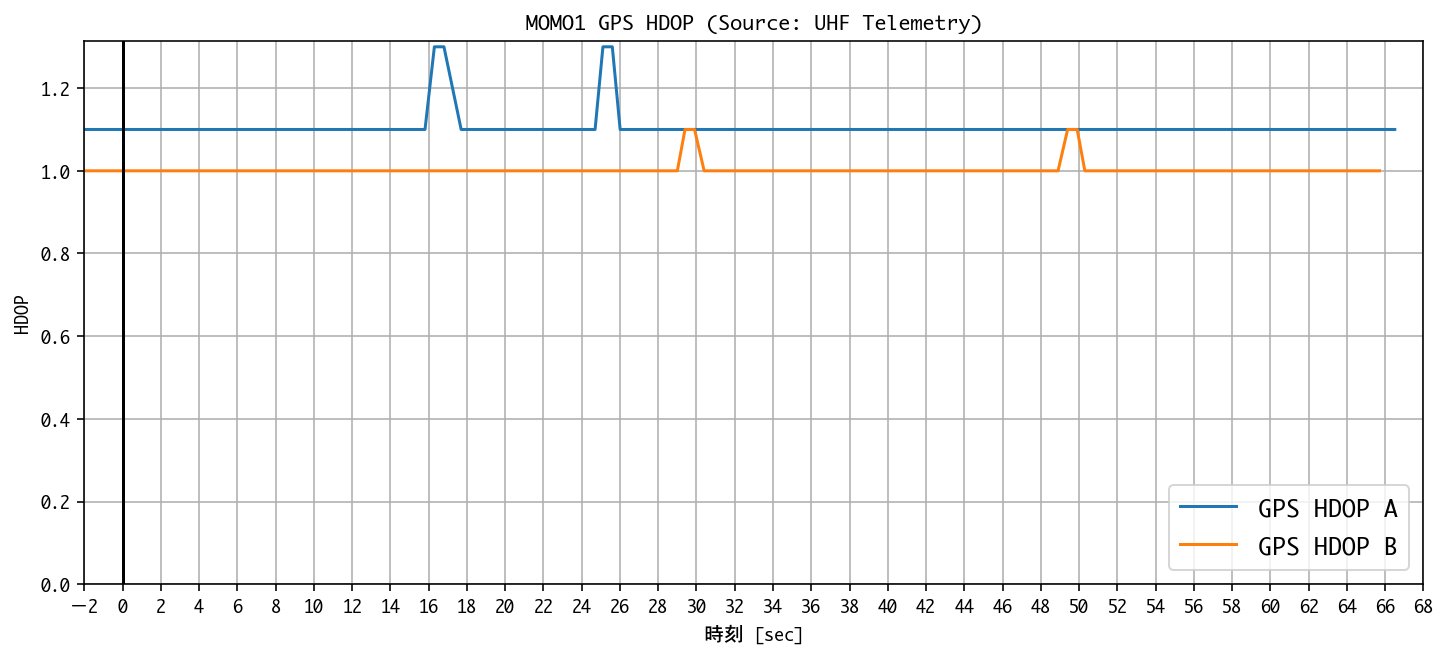

In [9]:
plt.figure()
plt.plot(df_fireflyA["T[s]"], df_fireflyA["satellites"], label="受信衛星数 A")
plt.plot(df_fireflyB["T[s]"], df_fireflyB["satellites"], label="受信衛星数 B")
plt.title("MOMO1 GPS 受信衛星数 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("衛星数 [個]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.ylim([0,16])
plt.axvline(x=0, color="k")
plt.grid()
plt.legend(fontsize=14)
plt.savefig(savename + "GPS_satellites" + ".png")

plt.figure()
plt.plot(df_fireflyA["T[s]"], df_fireflyA["hdop"], label="GPS HDOP A")
plt.plot(df_fireflyB["T[s]"], df_fireflyB["hdop"], label="GPS HDOP B")
plt.title("MOMO1 GPS HDOP " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("HDOP")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.ylim(ymin=0)
plt.axvline(x=0, color="k")
plt.grid()
plt.legend(fontsize=14)
plt.savefig(savename + "GPS_HDOP" + ".png")

## ジンバル

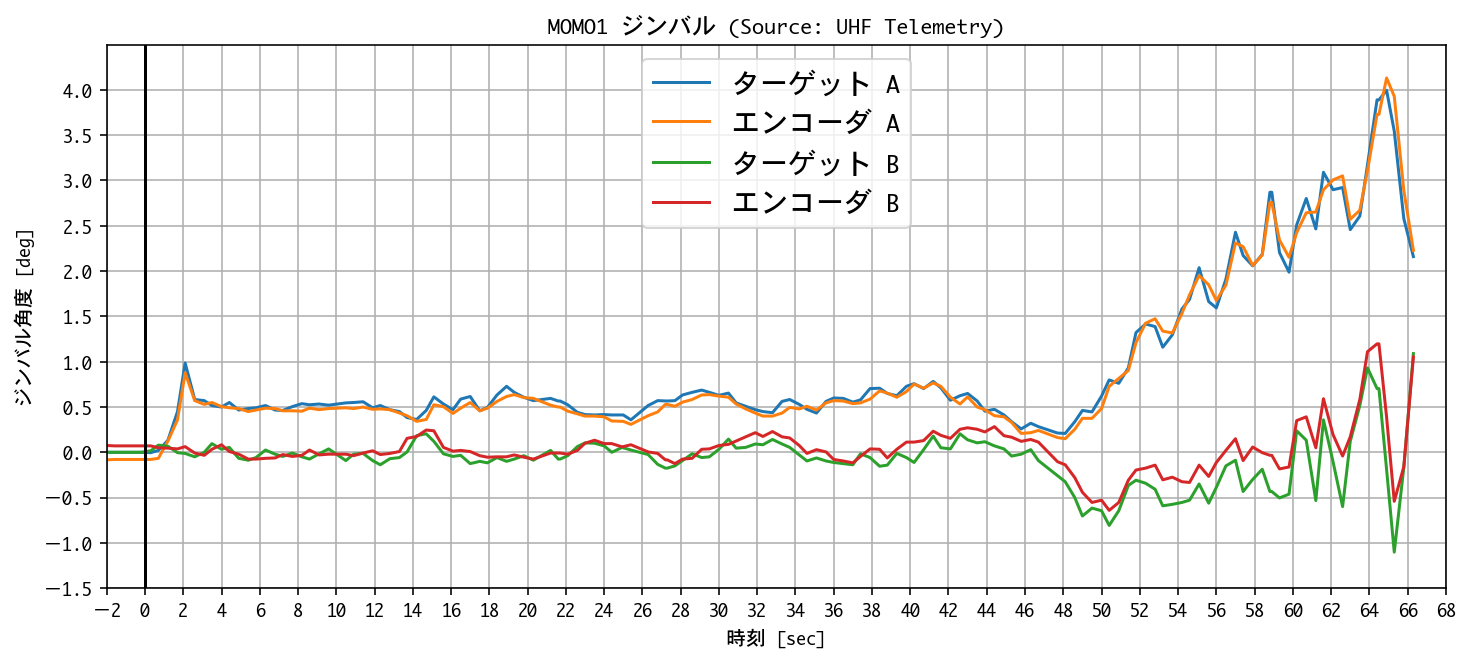

In [10]:
df_enc2deg = pd.read_csv("../csv/etc/enc2deg.csv")

enc2deg_f = interpolate.interp1d(df_enc2deg["enc"], df_enc2deg["gimbal[deg]"])
df_gimbal["target_a[deg]"] = enc2deg_f(df_gimbal["target_a[enc]"])
df_gimbal["encoder_a[deg]"] = enc2deg_f(df_gimbal["encoder_a[enc]"])
df_gimbal["target_b[deg]"] = enc2deg_f(df_gimbal["target_b[enc]"])
df_gimbal["encoder_b[deg]"] = enc2deg_f(df_gimbal["encoder_b[enc]"])

plt.figure()
plt.plot(df_gimbal["T[s]"], df_gimbal["target_a[deg]"], label="ターゲット A")
plt.plot(df_gimbal["T[s]"], df_gimbal["encoder_a[deg]"], label="エンコーダ A")
plt.plot(df_gimbal["T[s]"], df_gimbal["target_b[deg]"], label="ターゲット B")
plt.plot(df_gimbal["T[s]"], df_gimbal["encoder_b[deg]"], label="エンコーダ B")
plt.title("MOMO1 ジンバル " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("ジンバル角度 [deg]")
plt.xticks(np.arange(-2,70,2))
plt.yticks(np.arange(-1.5,4.5,0.5))
plt.xlim([-2, 68])
plt.ylim([-1.5, 4.5])
plt.axvline(x=0, color="k")
plt.grid()
plt.legend(fontsize=14)
plt.savefig(savename + "gimbal_deg" + ".png")

## 機体姿勢が回転せず、中立とした際のジンバル発生トルクから推定される外乱トルク
粗い計算

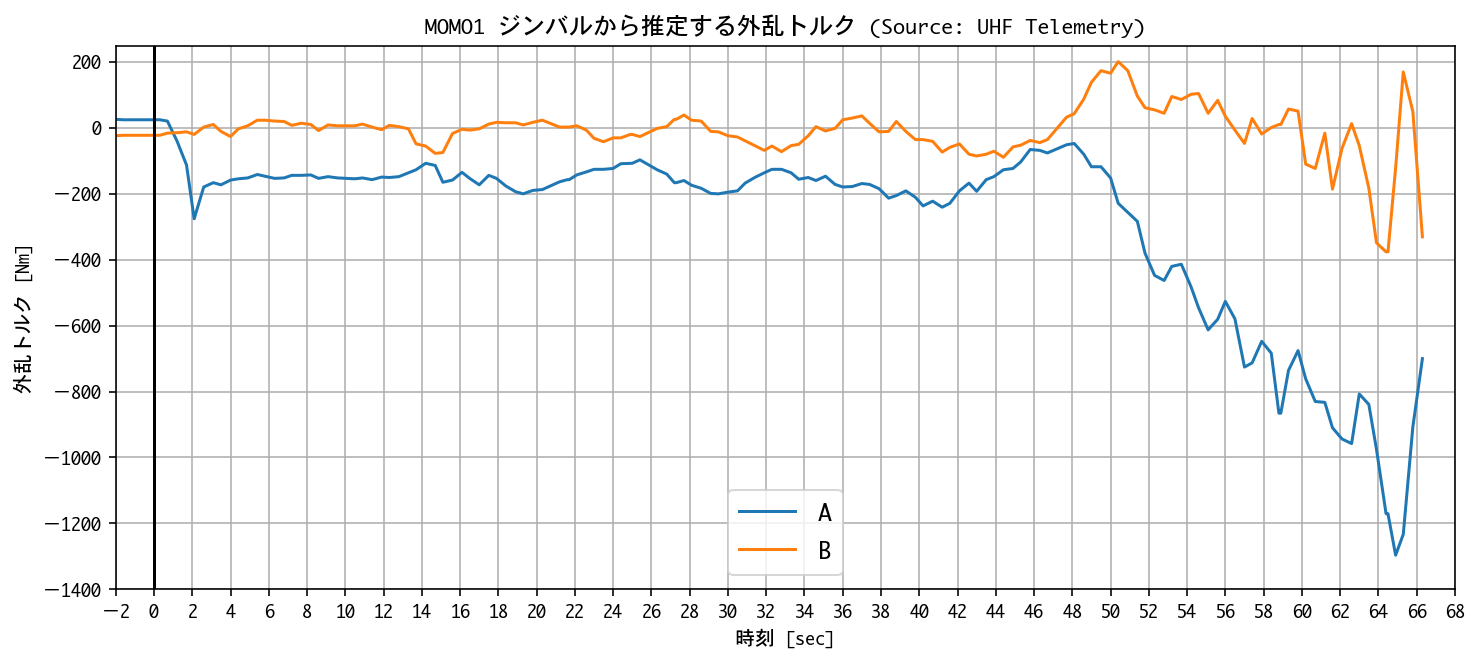

In [11]:
F = 12000  # 推力[N]
lcg = 1.5  # ピボットから重心までの位置[m]

torque_A = - F * lcg * sin(np.deg2rad(df_gimbal["encoder_a[deg]"]))
torque_B = - F * lcg * sin(np.deg2rad(df_gimbal["encoder_b[deg]"]))

plt.figure()
plt.plot(df_gimbal["T[s]"], torque_A, label="A")
plt.plot(df_gimbal["T[s]"], torque_B, label="B")
plt.title("MOMO1 ジンバルから推定する外乱トルク " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("外乱トルク [Nm]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.ylim([-1400, 250])
plt.axvline(x=0, color="k")
plt.grid()
plt.legend(fontsize=14)
plt.savefig(savename + "gimbal_torque" + ".png")

## VHFテレメトリのRSSI、バッテリー電圧

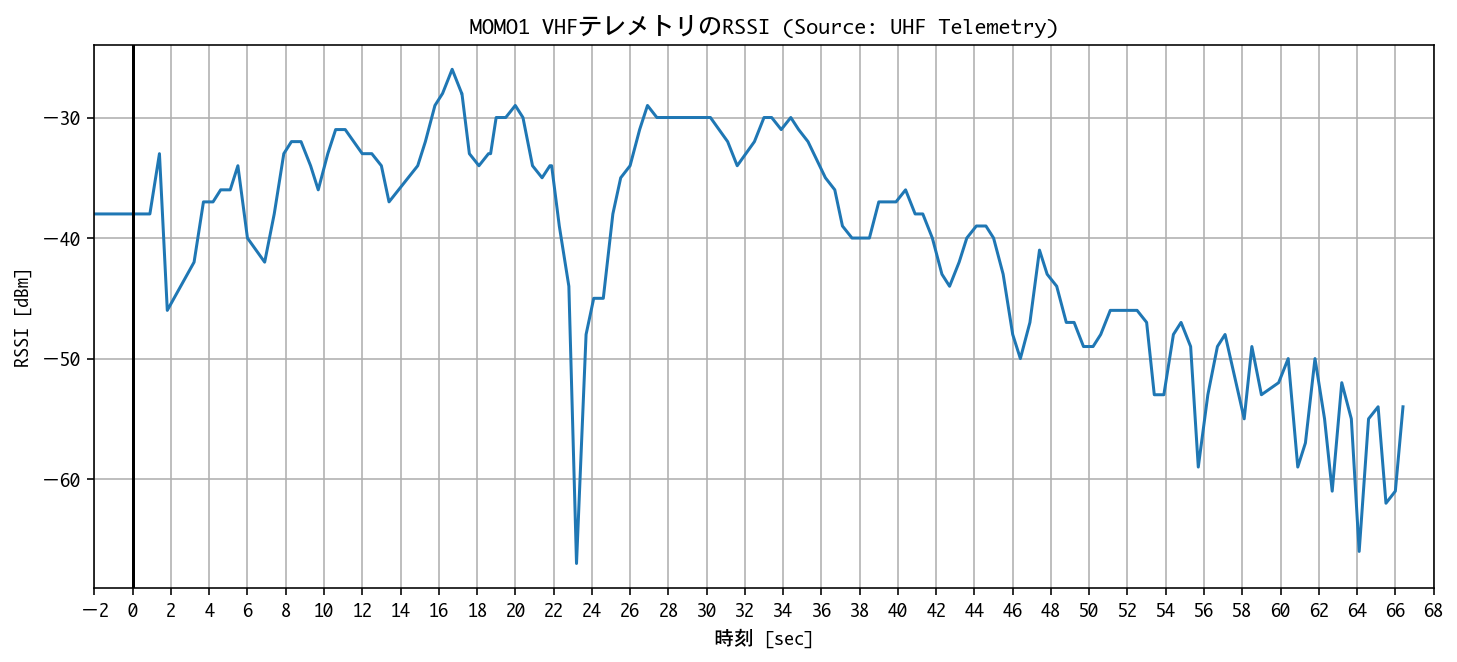

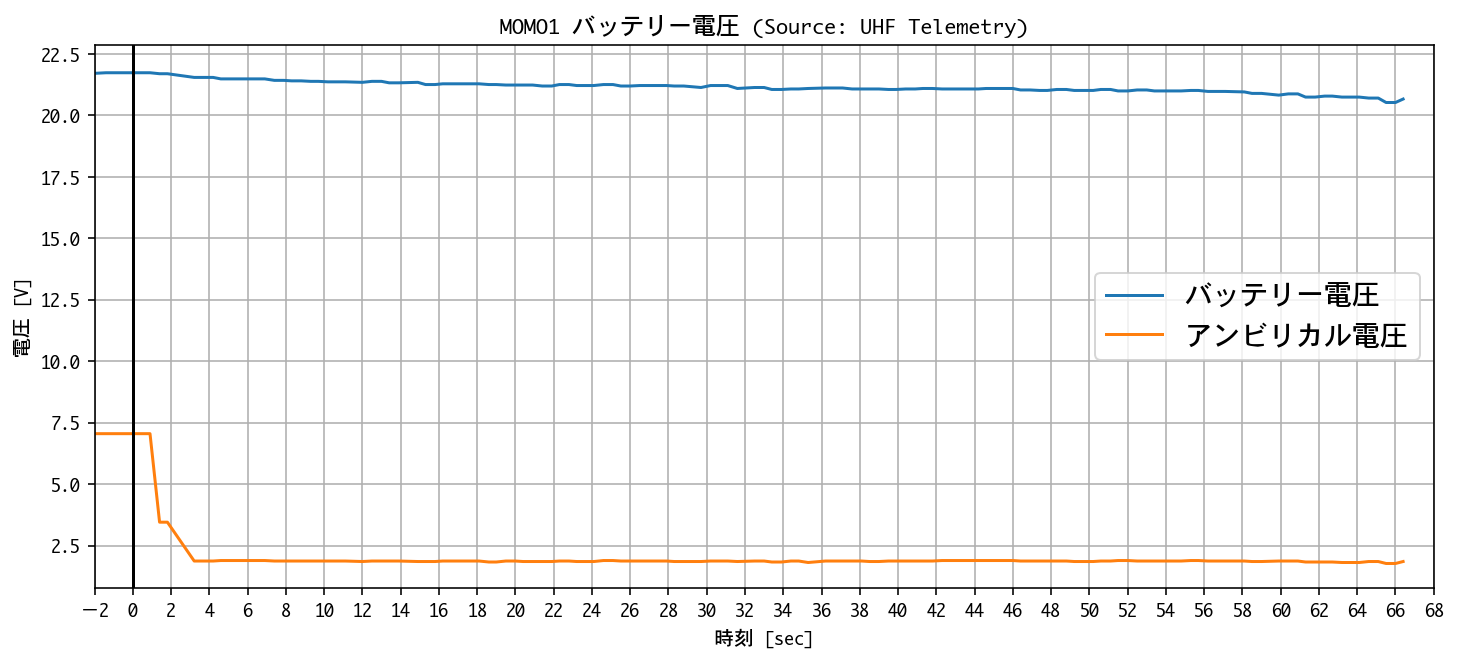

In [13]:
plt.figure()
plt.plot(df_command["T[s]"], df_command["control_rtti[dBm]"])
plt.title("MOMO1 VHFテレメトリのRSSI " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("RSSI [dBm]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.grid()
# plt.legend(fontsize=14)
plt.savefig(savename + "VHF_RSSI" + ".png")

plt.figure()
plt.plot(df_command["T[s]"], df_command["batt_v[V]"], label="バッテリー電圧")
plt.plot(df_command["T[s]"], df_command["unb_v[V]"], label="アンビリカル電圧")
plt.title("MOMO1 バッテリー電圧 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("電圧 [V]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.grid()
plt.legend(fontsize=14)
plt.savefig(savename + "battery" + ".png")

## UHFテレメトリのハードウエア受信機での受信感度

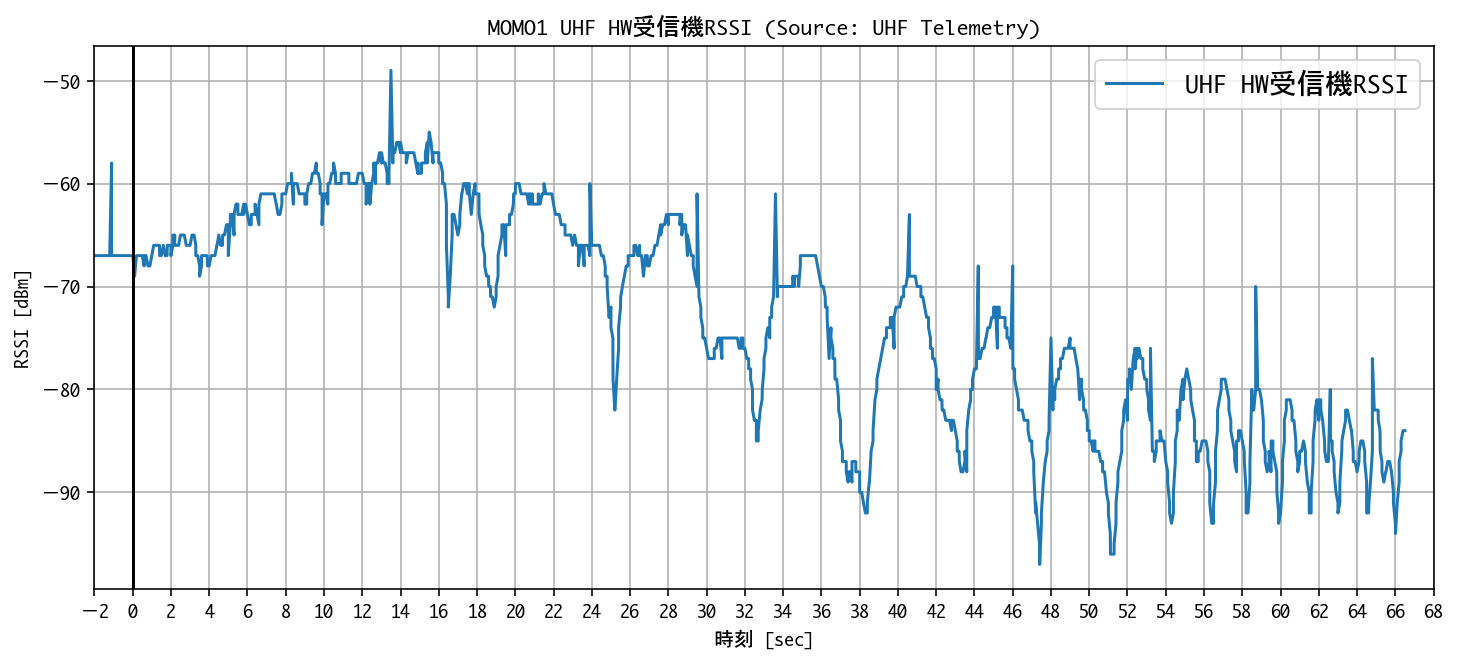

In [14]:
plt.figure()
plt.plot(df_rssi["T[s]"], df_rssi["receiver_rssi[dBm]"], label="UHF HW受信機RSSI")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 UHF HW受信機RSSI " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("RSSI [dBm]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "reciever_rssi" + ".png")

# 姿勢（クォータニオン）

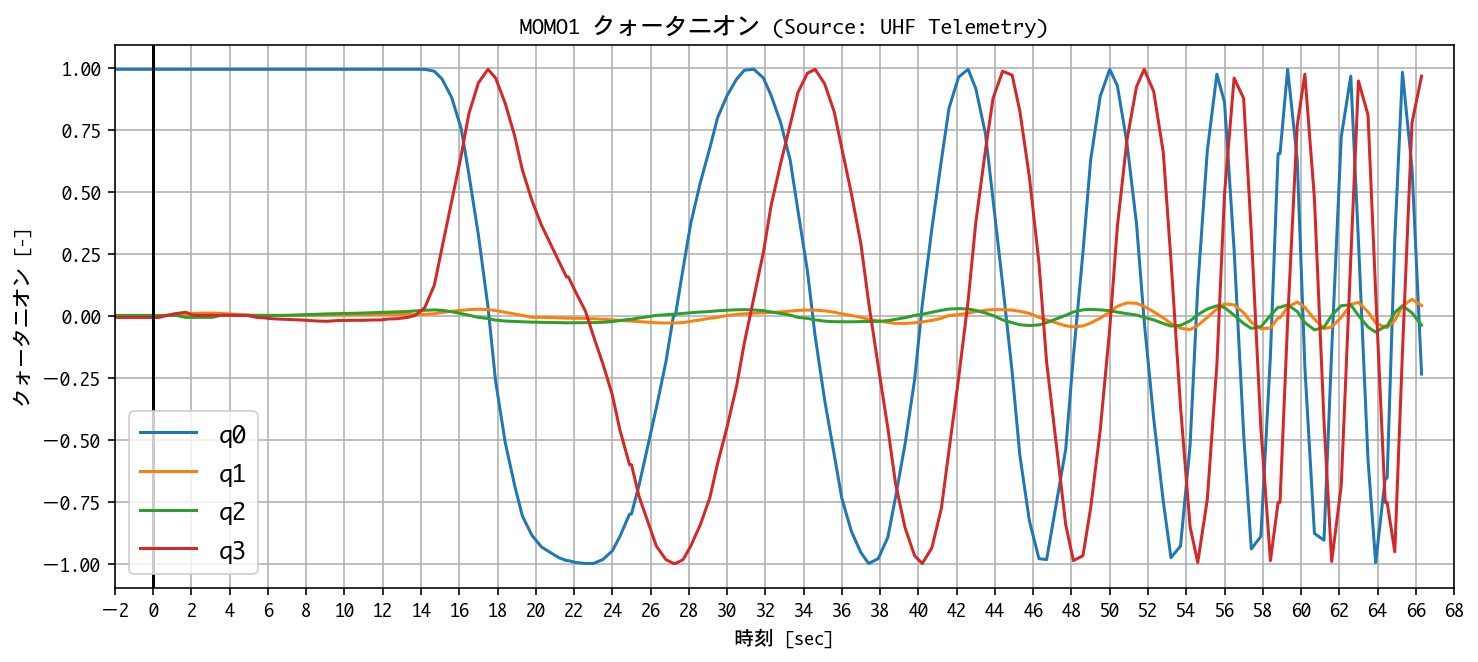

In [15]:
plt.figure()
plt.plot(df_q["T[s]"], df_q["q0"], label="q0")
plt.plot(df_q["T[s]"], df_q["q1"], label="q1")
plt.plot(df_q["T[s]"], df_q["q2"], label="q2")
plt.plot(df_q["T[s]"], df_q["q3"], label="q3")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 クォータニオン " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("クォータニオン [-]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "quaternion" + ".png")

## 姿勢（機軸の向き）
クォータニオンのテレメトリによる送信精度により90度付近での誤差があることに注意

In [16]:
# 指令角度を読み込み
df_a = pd.read_csv("../csv/etc/attitude_plan_nominal.csv")

q0 = df_q["q0"]
q1 = df_q["q1"]
q2 = df_q["q2"]
q3 = df_q["q3"]

# 機体の機体軸の向いている方角（アジマス角,エレベーション角）を計算
body_vec_x = np.zeros(0)
body_vec_y = np.zeros(0)
body_vec_z = np.zeros(0)
for i in range(len(q0)):
    qBL = np.quaternion(q0[i], q1[i], q2[i], q3[i])
    q = qBL * np.quaternion(0,0,0,1) * qBL.conj()
    body_vec_x = np.append(body_vec_x, q.x)
    body_vec_y = np.append(body_vec_y, q.y)
    body_vec_z = np.append(body_vec_z, q.z)
body_vec_xy = np.sqrt(body_vec_x**2 + body_vec_y**2)
df_q["elevation_body[deg]"] = rad2deg(np.arctan2(body_vec_z, body_vec_xy))
body_vec_y[body_vec_x<0.01] = -0.4226
body_vec_x[body_vec_x<0.01] = 0.9063  # バタつき防止
df_q["azimuth_body[deg]"] = rad2deg(np.arctan2(body_vec_x, body_vec_y))

# 機体のロール角を計算
body_vec_x = np.zeros(0)
body_vec_y = np.zeros(0)
body_vec_z = np.zeros(0)
for i in range(len(q0)):
    qBL = np.quaternion(q0[i], q1[i], q2[i], q3[i])
    q = qBL * np.quaternion(0,1,0,0) * qBL.conj()
    body_vec_x = np.append(body_vec_x, q.x)
    body_vec_y = np.append(body_vec_y, q.y)
    body_vec_z = np.append(body_vec_z, q.z)
df_q["roll_body[deg]"] = rad2deg(np.arctan2(body_vec_y, body_vec_x))
delta_t = df_q["T[s]"].diff()
delta_t = delta_t.where(delta_t > 0.01, 0.001)
roll_gyro = df_q["roll_body[deg]"].diff() / delta_t

roll_gyro = roll_gyro.where(roll_gyro >  -100, np.nan)

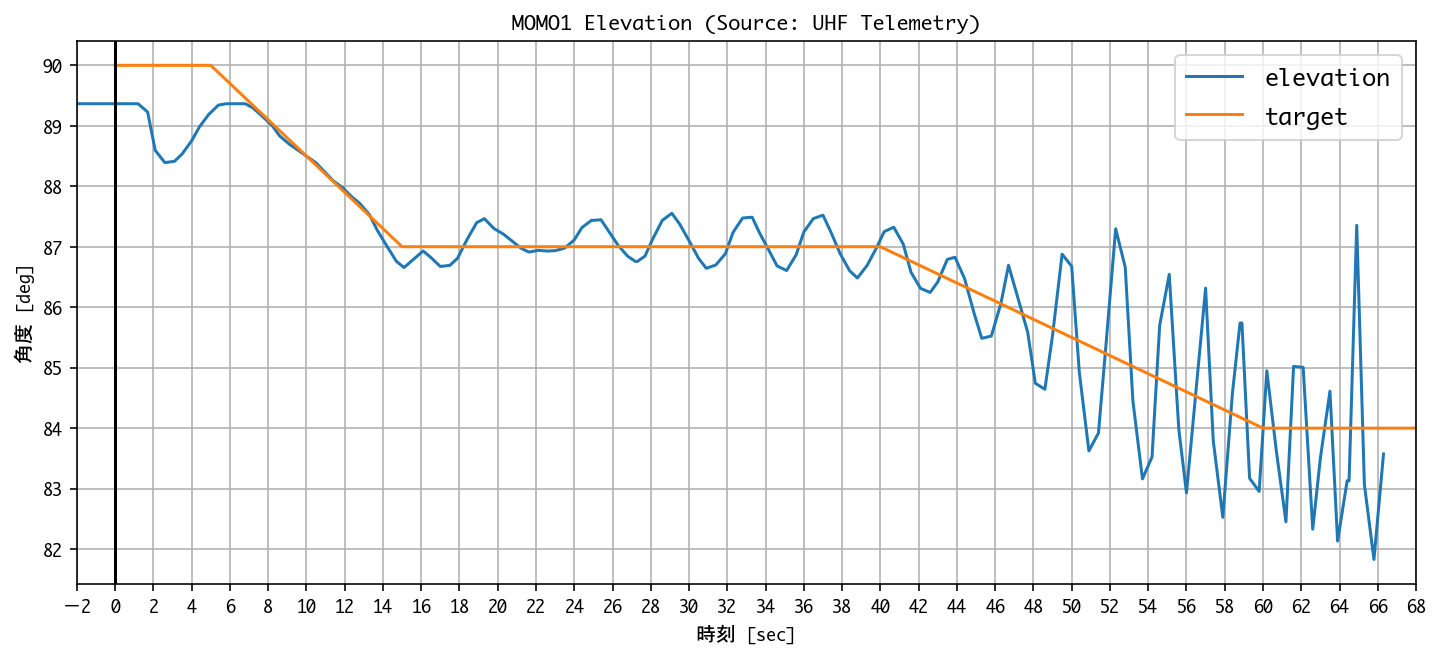

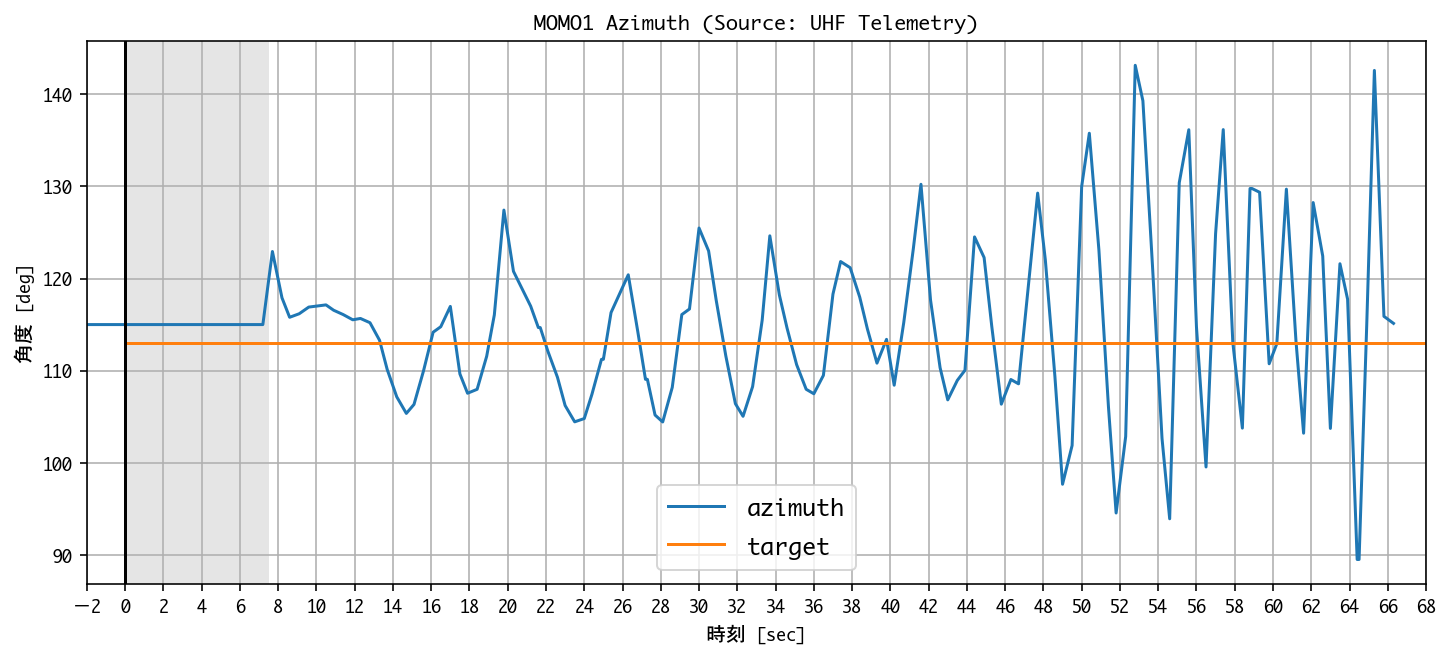

In [22]:
plt.figure()
plt.plot(df_q["T[s]"], df_q["elevation_body[deg]"], label="elevation")
plt.plot(df_a["time"], df_a["elevation"], label="target")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Elevation " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "elevation" + ".png")

plt.figure()
plt.plot(df_q["T[s]"], df_q["azimuth_body[deg]"], label="azimuth")
plt.plot(df_a["time"], df_a["azimth"], label="target")
plt.axvspan(0, 7.5, facecolor='0.5', alpha=0.2)
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Azimuth " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.axvline(x=0, color="k")
plt.savefig(savename + "azimuth" + ".png")

## ロール角
機体姿勢角度（クォータニオン）から、角速度は微分値、角加速度及び外乱のトルクは2階微分値になるので、ノイジーな値になることに注意

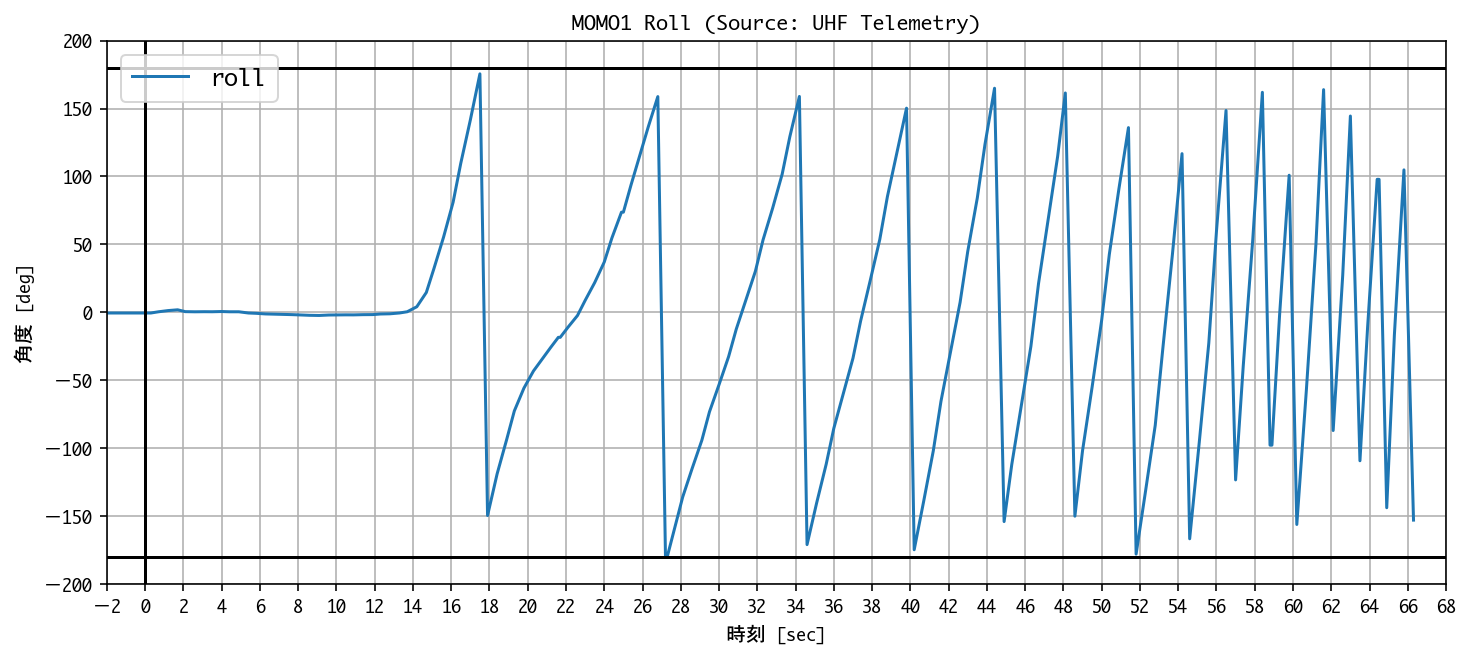

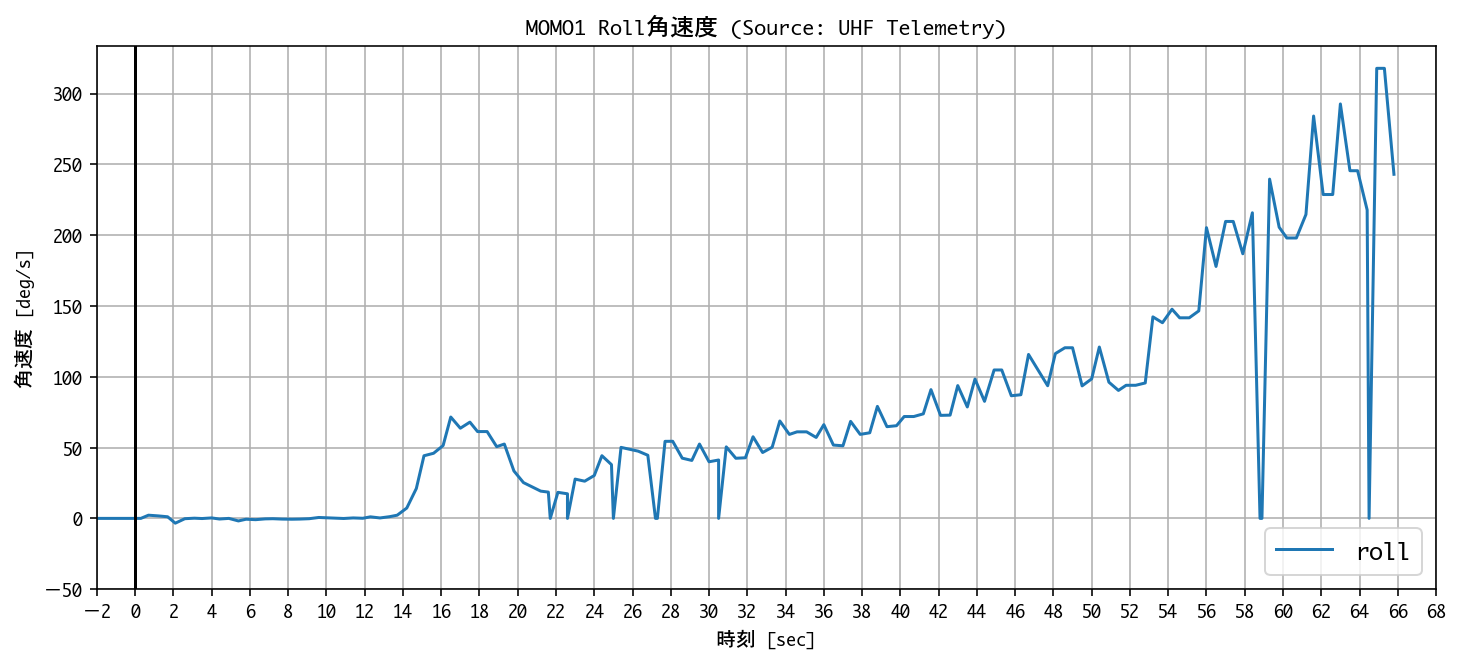

In [17]:
plt.figure()
plt.plot(df_q["T[s]"], df_q["roll_body[deg]"], label="roll")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Roll " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角度 [deg]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.ylim([-200, 200])
plt.axvline(x=0, color="k")
plt.axhline(y=-180, color="k")
plt.axhline(y=180, color="k")
plt.savefig(savename + "roll" + ".png")

roll_gyro = roll_gyro.fillna(method="bfill")

plt.figure()
plt.plot(df_q["T[s]"], roll_gyro, label="roll")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Roll角速度 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("角速度 [deg/s]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.ylim(ymin=-50)
plt.axvline(x=0, color="k")
# plt.axhline(y=-180, color="k")
# plt.axhline(y=180, color="k")
plt.savefig(savename + "roll_gyro" + ".png")

## 機体のロール方向に働いたトルク（制御トルク＋外乱トルク）

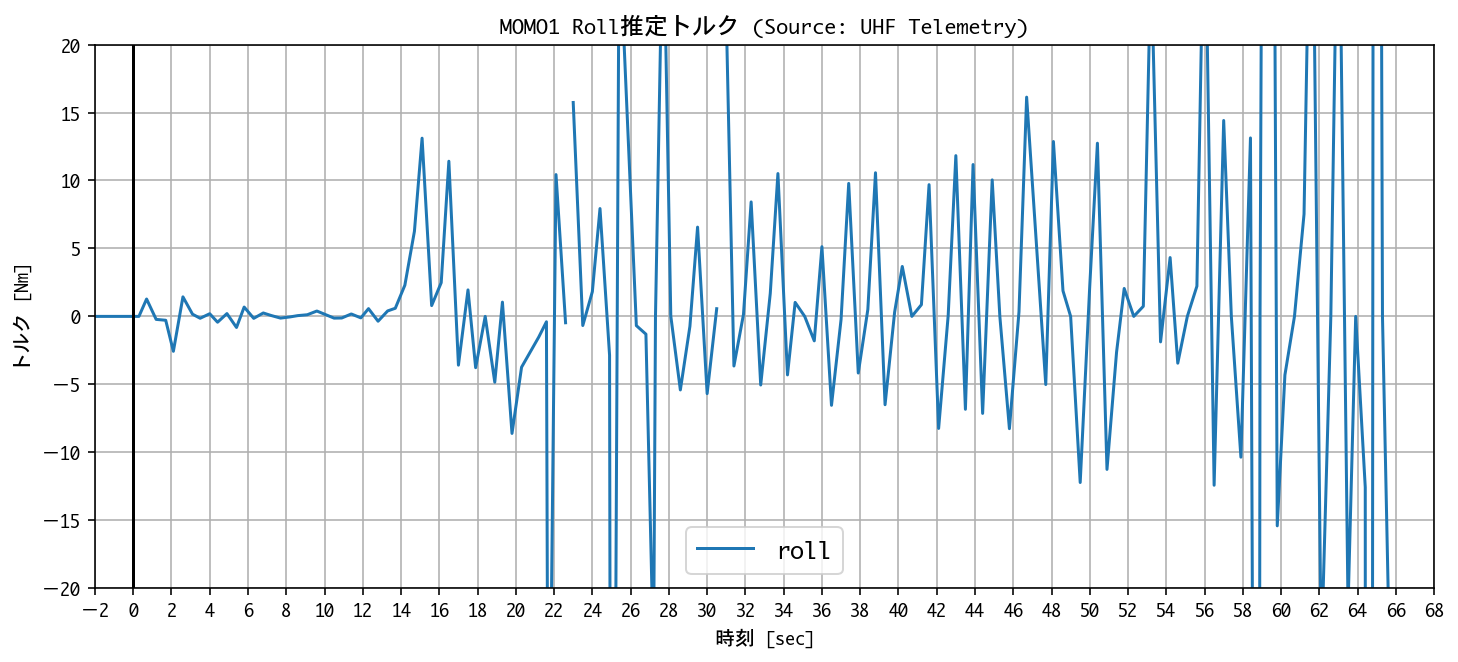

In [18]:
Izz = 13
delta_t = df_q["T[s]"].diff()
delta_t[1] = 0
roll_force = np.deg2rad(roll_gyro.diff() / delta_t)  * Izz

plt.figure()
plt.plot(df_q["T[s]"], roll_force, label="roll")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO1 Roll推定トルク " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("トルク [Nm]")
plt.xticks(np.arange(-2,70,2))
plt.xlim([-2, 68])
plt.ylim([-20, 20])
plt.axvline(x=0, color="k")
plt.savefig(savename + "roll_torque" + ".png")